In [24]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [25]:
#Task 1: Data Loading and Exploration

df = pd.read_csv("customer_churn_data.csv")

print("Shape of dataset:", df.shape)
print("\nData types and non-null values:")
print(df.info())

print("\nFirst 5 rows:")
print(df.head())

print("\nMissing values per column:")
print(df.isnull().sum())

print("\nSummary statistics:")
print(df.describe(include = 'all'))

Shape of dataset: (10000, 24)

Data types and non-null values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            10000 non-null  object 
 1   age                    10000 non-null  int64  
 2   gender                 10000 non-null  object 
 3   senior_citizen         10000 non-null  int64  
 4   partner                10000 non-null  object 
 5   dependents             10000 non-null  object 
 6   tenure                 10000 non-null  int64  
 7   phone_service          10000 non-null  object 
 8   multiple_lines         10000 non-null  object 
 9   internet_service       10000 non-null  object 
 10  online_security        10000 non-null  object 
 11  online_backup          10000 non-null  object 
 12  device_protection      10000 non-null  object 
 13  tech_support           10000 non-null  objec

Churn counts:
 churn
0    7728
1    2272
Name: count, dtype: int64
Churn rate: 22.72%


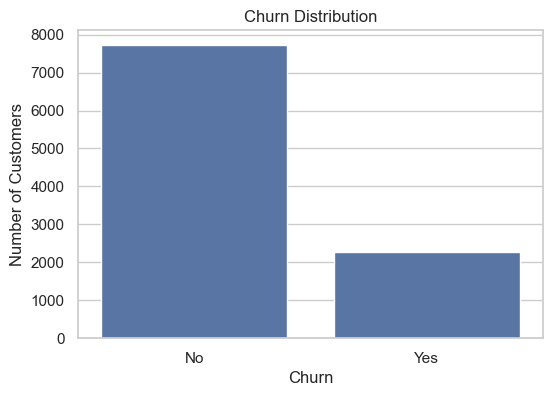

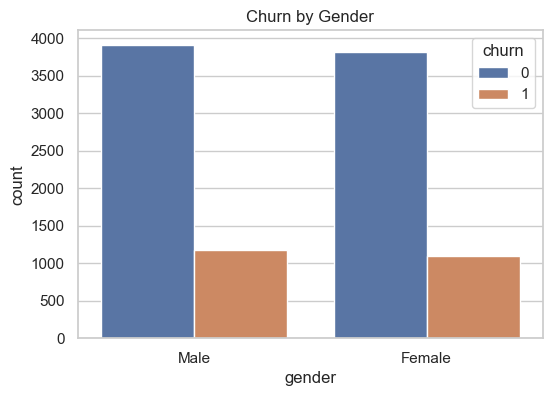

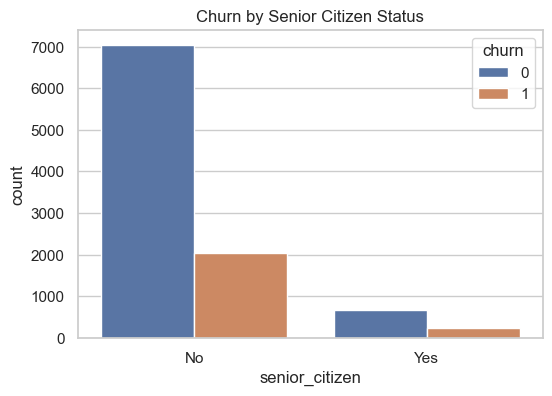

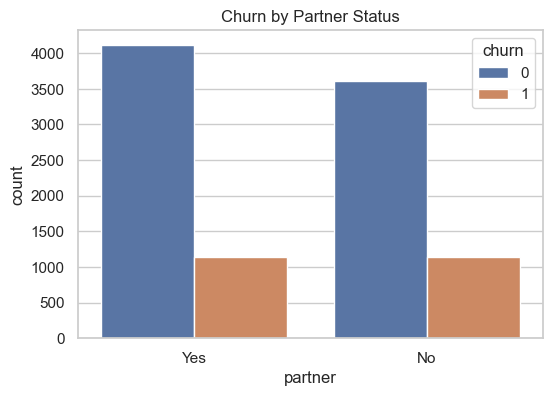

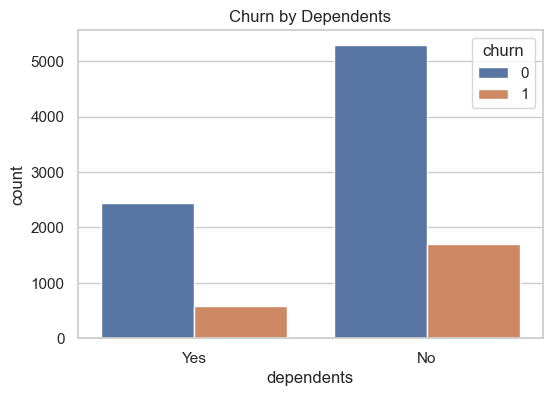

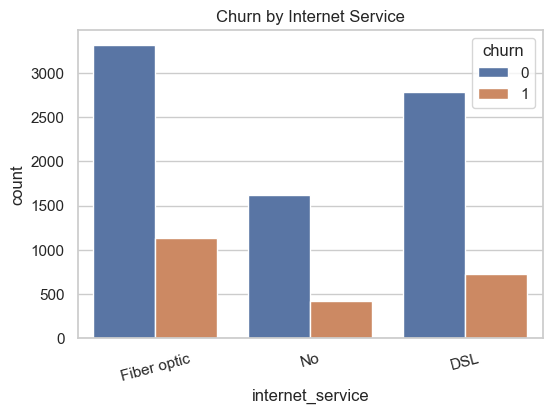

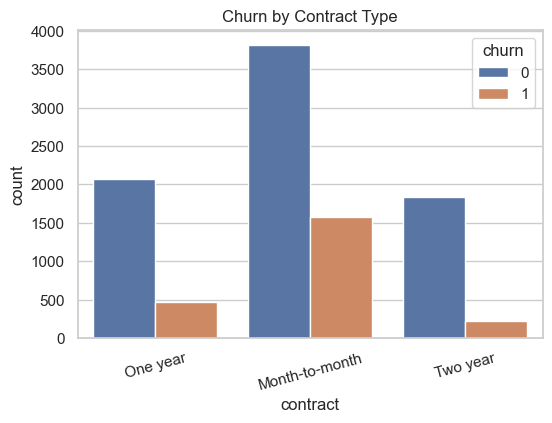

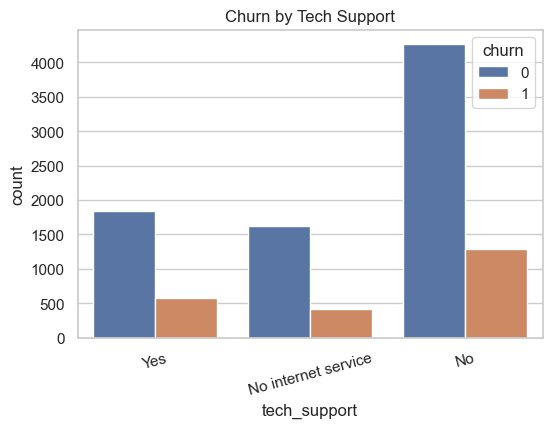

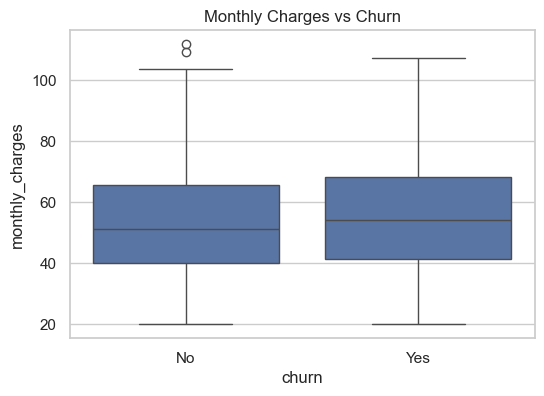

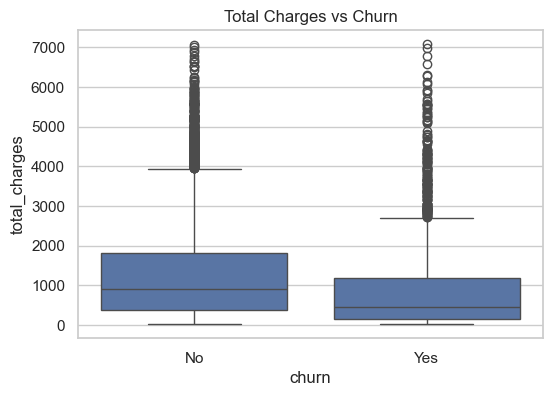

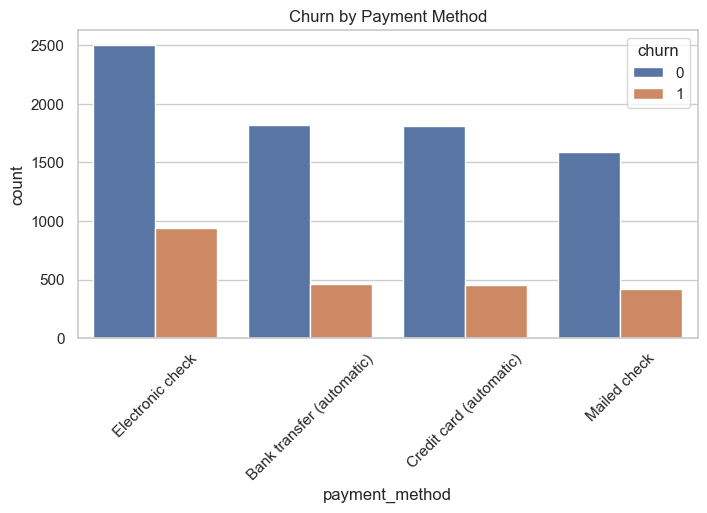

Text(0.5, 1.0, 'Correlation Analysis')

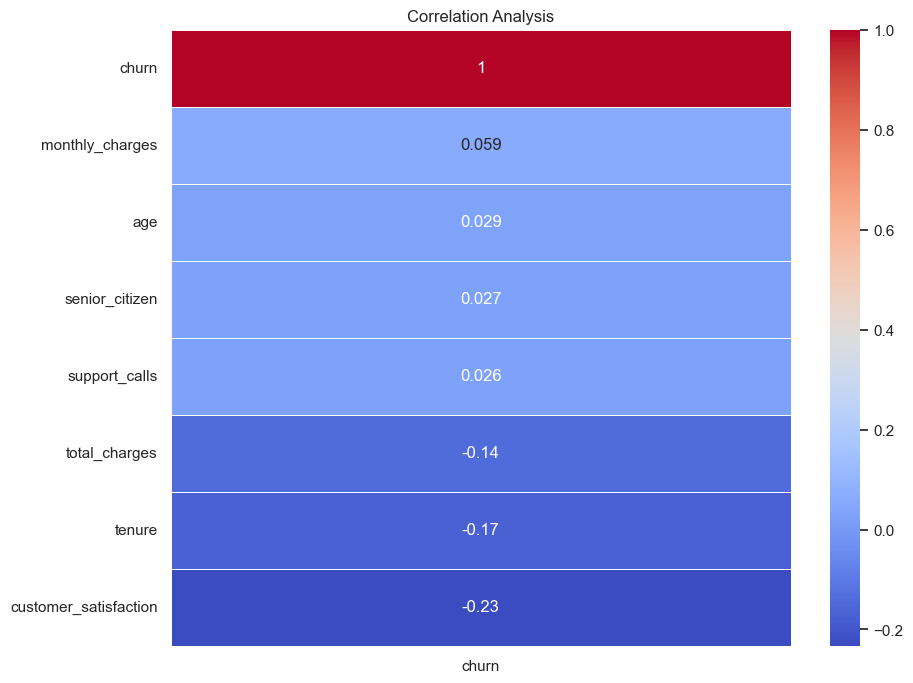

In [26]:
#Task 2: Exploratory Data Analysis (EDA)

sns.set(style = "whitegrid")
df['churn'] = df['churn'].map({'Yes': 1, 'No': 0})

churn_counts = df['churn'].value_counts()
churn_rate = df['churn'].mean()

print("Churn counts:\n", churn_counts)
print(f"Churn rate: {churn_rate:.2%}")

plt.figure(figsize = (6,4))
sns.countplot(x = 'churn', data = df)
plt.title("Churn Distribution")
plt.xticks([0,1],['No','Yes'])
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(data = df, x = 'gender', hue = "churn")
plt.title("Churn by Gender")
plt.show()

plt.figure(figsize = (6,4))
sns.countplot(data = df, x = 'senior_citizen', hue = "churn")
plt.title("Churn by Senior Citizen Status")
plt.xticks([0,1],['No','Yes'])
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(data = df, x = 'partner', hue = "churn")
plt.title("Churn by Partner Status")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(data = df, x = 'dependents', hue = "churn")
plt.title("Churn by Dependents")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(data = df, x = 'internet_service', hue = "churn")
plt.title("Churn by Internet Service")
plt.xticks(rotation=15)
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(data = df, x = 'contract', hue = "churn")
plt.title("Churn by Contract Type")
plt.xticks(rotation=15)
plt.show()

plt.figure(figsize = (6,4))
sns.countplot(data = df, x = 'tech_support', hue = "churn")
plt.title("Churn by Tech Support")
plt.xticks(rotation=15)
plt.show()

plt.figure(figsize = (6,4))
sns.boxplot(x = 'churn', y = 'monthly_charges', data = df)
plt.title("Monthly Charges vs Churn")
plt.xticks([0,1],['No','Yes'])
plt.show()

plt.figure(figsize = (6,4))
sns.boxplot(x = 'churn', y = 'total_charges', data = df)
plt.title("Total Charges vs Churn")
plt.xticks([0,1],['No','Yes'])
plt.show()

plt.figure(figsize = (8,4))
sns.countplot(data = df, x = 'payment_method', hue = "churn")
plt.title("Churn by Payment Method")
plt.xticks(rotation=45)
plt.show()

numeric_cols = df.select_dtypes(include = ['int64', 'float64'])
plt.figure(figsize = (10, 8))
corr_matrix = numeric_cols.corr()

sns.heatmap(corr_matrix[['churn']].sort_values(by = 'churn', ascending = False), annot = True, cmap = 'coolwarm', linewidth = 0.5)
plt.title("Correlation Analysis")
#plt.show()

In [27]:
#Task 3: Data Preprocessing

df = df.dropna()

X = df.drop("churn", axis = 1)
y = df["churn"]

num_cols = X.select_dtypes(include = ['int64', 'float64']).columns
cat_cols = X.select_dtypes(include = ['object', 'bool']).columns

encoder = OneHotEncoder(drop = 'first', sparse_output = False, handle_unknown='ignore')
X_cat = encoder.fit_transform(X[cat_cols])
X_cat = pd.DataFrame(X_cat, columns = encoder.get_feature_names_out(cat_cols))

scaler = StandardScaler()
X_num = scaler.fit_transform(X[num_cols])
X_num = pd.DataFrame(X_num, columns = num_cols)

X_processed = pd.concat([X_num.reset_index(drop = True), X_cat.reset_index(drop = True)], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print("Data preprocessing successfully completed!")

Data preprocessing successfully completed!


In [28]:
#Task 4: Model Development

model = LogisticRegression(max_iter = 1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


Accuracy: 0.7835
Precision: 0.6
Recall: 0.2064516129032258
F1 Score: 0.3072


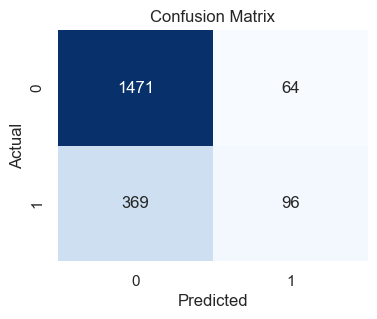

In [29]:
#Task 5: Model Evaluation

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (4,3))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', cbar = False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()